[View in Colaboratory](https://colab.research.google.com/github/lnarasimhan83/anzdemo/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [27]:
# https://keras.io/
!pip install -q keras
import keras

In [28]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


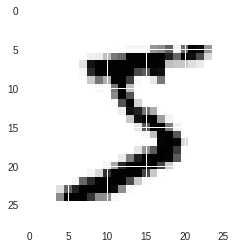

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [34]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [35]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(8, 5,5, activation='relu'))
model.add(Convolution2D(10, 22))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), activation="relu")`
  """


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 8)         6408      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 10)          38730     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 45,458
Trainable params: 45,458
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.1455 - acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0539 - acc: 0.9835
Epoch 3/10
 4800/60000 [=>............................] - ETA: 15s - loss: 0.0324 - acc: 0.9892

60000/60000 [==============================] - 17s 278us/step - loss: 0.0393 - acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0302 - acc: 0.9904
Epoch 5/10
11072/60000 [====>.........................] - ETA: 13s - loss: 0.0195 - acc: 0.9930

60000/60000 [==============================] - 17s 282us/step - loss: 0.0234 - acc: 0.9923
Epoch 6/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0180 - acc: 0.9942
Epoch 7/10
12800/60000 [=====>........................] - ETA: 13s - loss: 0.0110 - acc: 0.9969

60000/60000 [==============================] - 17s 282us/step - loss: 0.0155 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0115 - acc: 0.9961
Epoch 9/10
13376/60000 [=====>........................] - ETA: 13s - loss: 0.0084 - acc: 0.9975

60000/60000 [==============================] - 17s 281us/step - loss: 0.0113 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0085 - acc: 0.9972


In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [41]:
print(score)

[0.059237109868243945, 0.9868]


In [42]:
y_pred = model.predict(X_test)

In [43]:
print(y_pred[:9])
print(y_test[:9])

[[5.17302840e-17 1.06668083e-16 2.78627366e-09 2.04367172e-08
  8.90182326e-23 2.36117062e-15 5.03161478e-24 1.00000000e+00
  2.29154586e-13 3.27163231e-12]
 [1.01027346e-12 2.88343805e-14 1.00000000e+00 6.74846062e-20
  1.16000229e-23 2.09644235e-23 6.10379911e-13 3.07339987e-21
  2.48491779e-16 1.01650151e-19]
 [1.15853655e-11 9.99996066e-01 2.58963295e-09 1.97385755e-13
  2.70684427e-06 4.52322985e-10 3.02416370e-10 1.28403410e-09
  1.13802366e-06 4.36195741e-12]
 [1.00000000e+00 1.49298300e-22 1.77155718e-12 2.01988741e-21
  1.45100942e-18 9.95793532e-16 3.59559327e-11 4.22659717e-14
  7.35455466e-14 9.47265490e-15]
 [9.13176564e-15 1.00245574e-18 1.27992915e-15 1.45148434e-15
  9.99993801e-01 6.08238157e-19 1.51606931e-13 4.92550011e-13
  3.40394712e-10 6.24702216e-06]
 [3.78582311e-13 9.99997854e-01 3.83080567e-10 2.64023727e-15
  1.93533378e-06 6.94173885e-13 8.57671139e-13 6.12444282e-08
  1.04015292e-07 8.58239799e-11]
 [8.10180552e-19 1.46221302e-09 8.18845642e-13 6.88815189e

In [44]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_77'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored